# D1 Q4
Gibbs free energy of mixing in $SnO_2 - TiO_2 $

In [2]:
import numpy as np
import matplotlib.pyplot as plt

### 4.a) Calculate $\Delta H_{mix}$ and plot

Text(0, 0.5, '$\\Delta H_{mix}$ / $J mol^{-1}$')

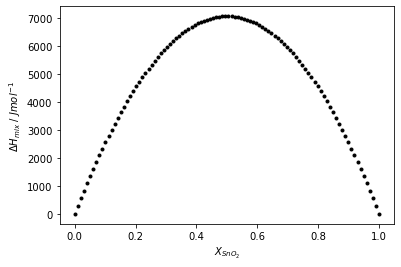

In [3]:
def calculate_H_mix(x_sn, psi=28300):
    """ Calculate enthalpy of mixing in J / mol"""
    H_mix = x_sn * (1-x_sn) * psi
    return H_mix

x_sn_arr = np.linspace(0,1,100)
H_mix_arr = calculate_H_mix(x_sn_arr)

plt.plot(x_sn_arr,H_mix_arr,'k.')
plt.xlabel('$X_{SnO_2}$')
plt.ylabel('$\Delta H_{mix}$ / $J mol^{-1}$')

### 4.b) Calculate $\Delta S_{mix}$ and plot

C:\Users\grl31\AppData\Local\Temp/ipykernel_20452/322747308.py:3: RuntimeWarning: divide by zero encountered in log
  S_mix = -8.31 * (x_sn*np.log(x_sn) + (1-x_sn)*np.log(1-x_sn))
C:\Users\grl31\AppData\Local\Temp/ipykernel_20452/322747308.py:3: RuntimeWarning: invalid value encountered in multiply
  S_mix = -8.31 * (x_sn*np.log(x_sn) + (1-x_sn)*np.log(1-x_sn))


Text(0, 0.5, '$\\Delta S_{mix}$ / $J K^{-1} mol^{-1}$')

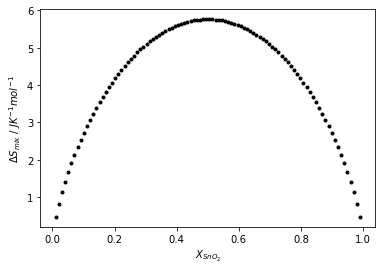

In [4]:
def calculate_S_mix(x_sn):
    """ Calculate entropy of mixing in J / K / mol"""
    S_mix = -8.31 * (x_sn*np.log(x_sn) + (1-x_sn)*np.log(1-x_sn))
    return S_mix

x_sn_arr = np.linspace(0,1,100)
S_mix_arr = calculate_S_mix(x_sn_arr)

plt.plot(x_sn_arr,S_mix_arr,'k.')
plt.xlabel('$X_{SnO_2}$')
plt.ylabel('$\Delta S_{mix}$ / $J K^{-1} mol^{-1}$')

### 4.c) Calculate $\Delta G_{mix}$ and plot at several T

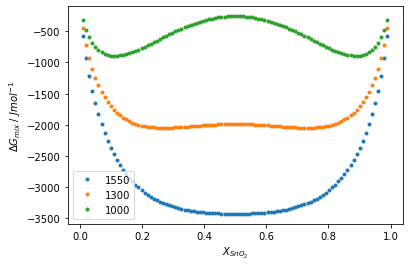

In [5]:
def calculate_G_mix(x_sn,T):
    """ Calculate Gibbs free energy of mixing in J / mol,
    Input: SnO2 mol fraction and T in celsius """
    H_mix = calculate_H_mix(x_sn)
    S_mix = calculate_S_mix(x_sn)
    G_mix = H_mix - S_mix*(T+273.15)
    return G_mix

x_sn_arr = np.linspace(0.01,0.99,100)
Ts = [1550, 1300, 1000]

for T in Ts:
    G_mix_arr = calculate_G_mix(x_sn_arr, T)
    plt.plot(x_sn_arr,G_mix_arr,'.',label=T)
    
plt.xlabel('$X_{SnO_2}$')
plt.ylabel('$\Delta G_{mix}$ / $J mol^{-1}$')
plt.legend()

### 4.d) Estimate coesxisting phase compositions at 1300 C and 1000 C, plot solvus

- Note that this code only works for ideal solutions (Mixing A into B is as easy as mixing B into A).
- In real solutions, this is not necesarily true, and we may get asymmetrical distributions.
- In that case, we should create a more sophisticated function which identifies the compositions corresponding to the common tangent
- In our ideal case however, we can simplify identify the minimum of the $\Delta G_{mix}$ curve

Text(0.5, 1.0, 'Solvus plot')

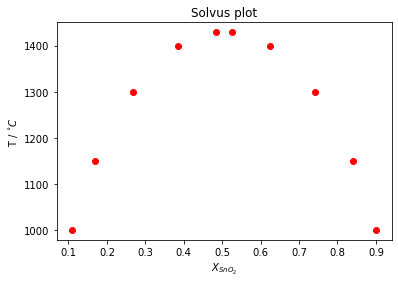

In [31]:
Ts = [1550, 1429, 1400, 1300, 1150, 1000] # We need a bigger range of temperatures to see the solvus better


for T in Ts:
    # Calculate index of minimum
    G_mix_arr = calculate_G_mix(x_sn_arr, T)
    gmin = np.min(G_mix_arr)
    i_gmin = np.array(np.where(G_mix_arr == gmin)[0])
    
    # Check if it forms two phases still
    if len(i_gmin) > 1: # If it does, then plot it!
        i_gmin = i_gmin[0]
        plt.scatter(x_sn_arr[i_gmin],T, color='r')
        plt.scatter(x_sn_arr[100-i_gmin],T, color='r')
        
    else:     # If it doesn't, we are above the solvus
        pass
    
plt.xlabel('$X_{SnO_2}$')
plt.ylabel('T / $^{\circ}C$')
plt.title('Solvus plot')